# Second version of data analysis

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [341]:
# file path
file_path = r"C:\Users\belan\bap_thesis\data\final_combined_data.csv"

# read data
data = pd.read_csv(file_path)

# check head 
print(data.head())



   Country  essround  edition          idno   dweight  pspwght   pweight  \
0  Austria       1.0      6.7   1977.049623  0.999998      1.0  0.271487   
1  Austria       2.0      3.6   2201.447695  1.000017      1.0  0.302006   
2  Austria       3.0      3.7   2738.014553  1.000005      1.0  0.289116   
3  Austria      10.0      3.1  33847.528210  1.000000      1.0  0.381786   
4  Austria       7.0      2.3   1771.375487  1.000000      1.0  0.406019   

   anweight      prob    stratum  ...   e_wb_pop  e_pechmor  e_miinteco  \
0  0.271488       NaN        NaN  ...  8081957.0       5.31         NaN   
1       NaN       NaN        NaN  ...  8171966.0       5.05         NaN   
2       NaN       NaN        NaN  ...  8268641.0       4.76         NaN   
3  0.381786  0.000839  59.987019  ...  8321496.0       4.54         NaN   
4  0.406019       NaN        NaN  ...  8546356.0       3.80         NaN   

   e_civil_war  e_miinterc  e_pt_coup  e_pt_coup_attempts  \
0          0.0         NaN     

# Data exploration

Descriptive statistics, distributions, correlation and multicollinearity , vif

In [342]:
# needed data:

# IV IV:  Foreign governments dissemination of false information (C) 
#   (v2smfordom)

# DV DV:  trust in government ( overall_trust_national )

# control variables:
#   - Government social media censorship in practice (v2smgovsmcenprc)
#   - perceptions of corruption (v2x_corr) 
#   - Economic satisfaction (stfeco) 
#   - electoral democracy index (v2x_polyarchy)
#   -  Government dissemination of false information domestic (v2smgovdom)
#   -  Education 15+ (e_peaveduc)

# interaction variables:
# Hypothesis 1: polarization - Polarization of society (C) (v2smpolsoc)
# Hypothesis 2: level of internet penetration, percentage of population who has internet access ( Level of Internet Penetration )

# model:
# multilevel model with 
# level 1: country level
# level 2: regional level (west vs east europe)
# level 3: year level





In [343]:
# check how the needed data looks
print(data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 
            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom', 
            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].head())

   v2smfordom  overall_trust_national  v2smgovsmcenprc  v2x_corr    stfeco  \
0       0.232                7.045968             2.14     0.098  8.369960   
1       0.232                6.970035             2.14     0.103  8.247340   
2       0.232                7.579044             2.14     0.089  9.832848   
3       0.232                5.465502             2.14     0.072  6.814279   
4      -0.013                5.956992             2.14     0.051  6.355989   

   v2x_polyarchy  v2smgovdom  e_peaveduc  v2smpolsoc  \
0          0.860       1.542      11.292       0.789   
1          0.861       1.542      11.344       0.789   
2          0.865       1.542      11.396       0.789   
3          0.874       1.542      11.448       0.789   
4          0.873       1.702      11.500       0.589   

   Level_of_Internet_Penetration  
0                        36.5600  
1                        54.2800  
2                        63.6000  
3                        72.8700  
4                  

In [344]:
# check scale and measurement of variables
print(data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 
            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom', 
            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].describe())


       v2smfordom  overall_trust_national  v2smgovsmcenprc    v2x_corr  \
count  234.000000              234.000000       234.000000  234.000000   
mean     0.951581                6.348752         1.747949    0.087983   
std      1.180356                1.240355         0.466954    0.107012   
min     -3.202000                3.390939         0.539000    0.002000   
25%      0.251000                5.584161         1.526000    0.017000   
50%      0.757000                6.160749         1.899500    0.044000   
75%      1.737750                6.929971         2.093000    0.119250   
max      3.122000               13.177030         2.380000    0.650000   

           stfeco  v2x_polyarchy  v2smgovdom  e_peaveduc  v2smpolsoc  \
count  234.000000     234.000000  234.000000  216.000000  234.000000   
mean     6.572543       0.862017    1.891073   11.283255    0.573372   
std      1.841096       0.057739    0.799355    1.292267    1.261106   
min      1.472192       0.588000   -1.324000 

Variabelen en Schalen

a) v2smfordom (IV: Foreign Government Dissemination of False Information)

Bereik: Negatief (-0.013) tot positief (0.232) in dit voorbeeld.
Dit lijkt een z-scoreschaal of een gestandaardiseerde schaal te zijn. Negatieve waarden duiden waarschijnlijk op een lagere mate van desinformatie, terwijl positieve waarden wijzen op een hogere mate van verspreiding.
Geschikt voor regressie als continu variabele.

b) overall_trust_national (DV: Trust in Government)

Bereik: 5.46 tot 7.58 in dit voorbeeld.
Dit is een gemiddelde van een schaal (waarschijnlijk 1-10) per land en jaar. Het gemiddelde ligt binnen de verwachte range en lijkt consistent.
Geschikt voor regressie als continu variabele.


c) v2smgovsmcenprc (Control: Social Media Censorship in Practice)

Bereik: 2.14 (constant in dit voorbeeld).
Deze waarde lijkt weinig variatie te hebben in de getoonde data. Controleer of deze variabele variatie vertoont tussen landen en jaren. Als de variabele constant is, biedt deze mogelijk geen extra verklarende kracht in het model.


d) v2x_corr (Control: Perceptions of Corruption)

Bereik: 0.051 tot 0.103 in dit voorbeeld.
Lijkt een index met waarden tussen 0 en 1, wat consistent is met de schaal van V-Dem. Geschikt als controlevariabele.


e) stfeco (Control: Economic Satisfaction)

Bereik: 6.35 tot 9.83 in dit voorbeeld.
Een schaal die variatie in economische tevredenheid weergeeft. Waarden passen binnen de context van gemiddelden per land en jaar. Geschikt voor regressie.


f) v2x_polyarchy (Control: Electoral Democracy Index)

Bereik: 0.860 tot 0.874 in dit voorbeeld.
Een index van democratie (0-1). Kleine variaties suggereren een hoge democratische kwaliteit in de meeste getoonde landen, maar er is voldoende variatie voor regressie.


g) v2smgovdom (Control: Government Dissemination of False Information - Domestic)

Bereik: 1.542 tot 1.702 in dit voorbeeld.
Dit lijkt een continu variabele te zijn die ook informatie over desinformatie bevat. Geschikt voor regressie.


h) e_peaveduc (Control: Education 15+)

Waarden rond 11.3 tot 11.5 in dit voorbeeld.
Dit is het gemiddelde aantal jaren onderwijs per land. Waarden zijn continu en geschikt voor regressie.


i) v2smpolsoc (Interaction: Polarization of Society)

Waarden rond 0.589 tot 0.789 in dit voorbeeld.
Deze variabele lijkt goed geschaald, met variatie die geschikt is voor regressie.

j) Level_of_Internet_Penetration (Interaction: Percentage with Internet Access)

Bereik: 36.56 tot 80.99 in dit voorbeeld.
Dit is een percentage, wat een continu variabele is. Geschikt voor regressie.

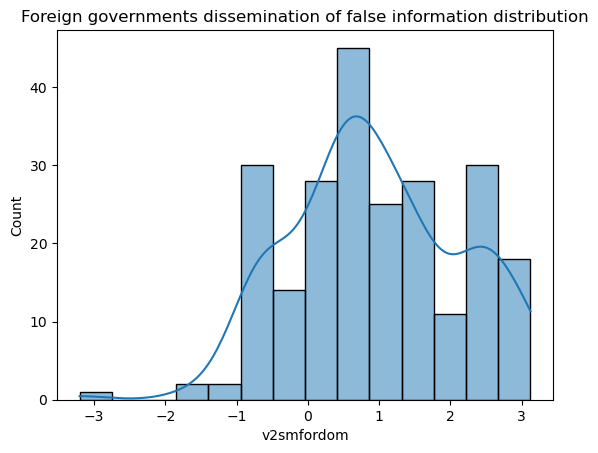

In [345]:
# distribution of the variables

# IV: Foreign governments dissemination of false information (C) (v2smfordom)
sns.histplot(data['v2smfordom'], kde=True)
plt.title('Foreign governments dissemination of false information distribution')
plt.show()

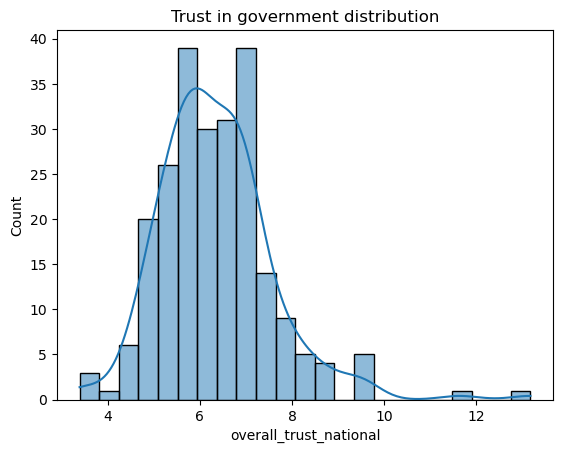

In [346]:
# distribution DV: trust in government ( overall_trust_national )
sns.histplot(data['overall_trust_national'], kde=True)
plt.title('Trust in government distribution')
plt.show()

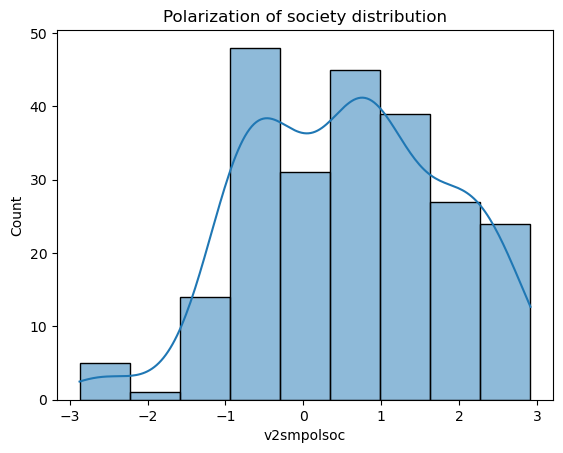

In [347]:
# distribution of interaction variables 
# polarization - Polarization of society (C) (v2smpolsoc)
sns.histplot(data['v2smpolsoc'], kde=True)
plt.title('Polarization of society distribution')
plt.show()

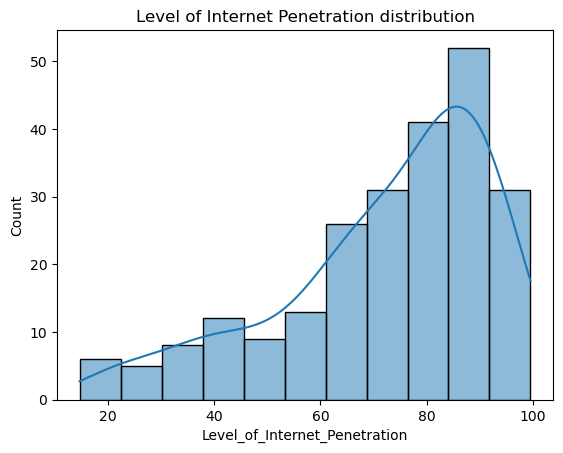

In [348]:
# level of internet penetration, percentage of population who has internet access ( Level of Internet Penetration )
sns.histplot(data['Level_of_Internet_Penetration'], kde=True)   
plt.title('Level of Internet Penetration distribution')
plt.show()

Check correlation and multicollinearity 

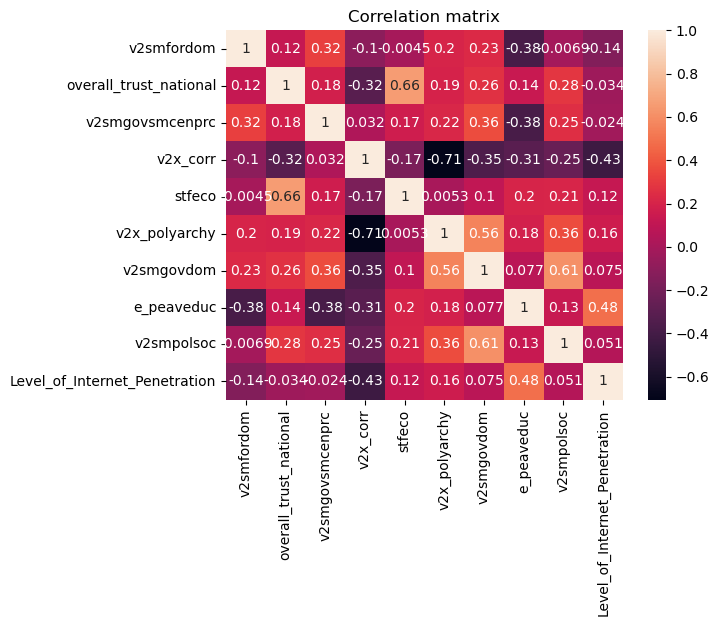

In [349]:
correlation_matrix = data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc',
                            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom',
                            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

stfeco and overall_trust_national (0.66): A relatively strong correlation. This makes sense, because economic satisfaction is closely related to trust in government. This may affect the explanatory power of this variable in the model, so check VIF to assess multicollinearity.


v2x_corr and v2x_polyarchy (-0.71): This negative correlation shows that countries with a higher degree of democracy have less corruption perceptions. This could potentially lead to multicollinearity.


What do we see: 
- v2x_polyarchy and v2x_corr: Correlation = -0.71
These two variables are highly correlated, likely capturing overlapping concepts (e.g., democracy and corruption perception). Consider removing one of them.


- v2x_polyarchy and e_peaveduc: Correlation = 0.56
Strong, but less severe. May not need immediate action.


- stfeco and overall_trust_national: Correlation = 0.66
Economic satisfaction is naturally tied to trust in government, but the strong correlation could affect multicollinearity.

- v2smgovdom and v2smpolsoc: Correlation = 0.61

but all models are compliant with my theoretical framework



In [350]:
# check vif for multicollinearity to give a formal check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecteer de relevante variabelen
X = data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 'v2x_corr', 'stfeco', 
          'v2x_polyarchy', 'v2smgovdom', 'e_peaveduc', 
          'v2smpolsoc', 'Level_of_Internet_Penetration']]

# look at missing values
print(X.isnull().sum())



v2smfordom                        0
overall_trust_national            0
v2smgovsmcenprc                   0
v2x_corr                          0
stfeco                            0
v2x_polyarchy                     0
v2smgovdom                        0
e_peaveduc                       18
v2smpolsoc                        0
Level_of_Internet_Penetration     0
dtype: int64


In [351]:
# Step 1: Add 'Country' and 'Year' columns to X
X = X.copy()  # make an explicit copy of the DataFrame
X['Country'] = data['Country']
X['Year'] = data['Year']  # Ensure the 'Year' column is included

# Step 2: Impute based on both 'Country' and 'Year'
X['e_peaveduc'] = X.groupby(['Country', 'Year'])['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 3: Fallback to country-level mean
X['e_peaveduc'] = X.groupby('Country')['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 4: Fallback to year-level mean
X['e_peaveduc'] = X.groupby('Year')['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 5: Fallback to overall mean
X['e_peaveduc'] = X['e_peaveduc'].fillna(X['e_peaveduc'].mean())

# Step 6: Remove 'Country' and 'Year' columns after imputation
X = X.drop(columns=['Country', 'Year'])

# Step 7: Check if there are any missing values left
print("Missing values in 'e_peaveduc':", X['e_peaveduc'].isnull().sum())


Missing values in 'e_peaveduc': 0


In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                        Variable         VIF
0                     v2smfordom    2.273293
1         overall_trust_national   56.678432
2                v2smgovsmcenprc   27.671823
3                       v2x_corr    2.580742
4                         stfeco   27.650464
5                  v2x_polyarchy  176.901067
6                     v2smgovdom   14.078739
7                     e_peaveduc  168.429248
8                     v2smpolsoc    2.091509
9  Level_of_Internet_Penetration   24.866842


Problematic Variables:
- v2x_polyarchy (170.9) ( electoral democracy index )
- e_peaveduc (167.5) (Education 15+)
- v2smgovsmcenprc (27.7) ( Government social media censorship in practice )
- Level_of_Internet_Penetration (23.2)
- stfeco (16.3) (satisfaction with economy )

These high values suggest strong multicollinearity between variables, which can distort regression coefficients and make the model unstable.

In [353]:
# centre and scale the data to see if it improves the vif
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Variable"] = X_scaled.columns

vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif_data_scaled)



                        Variable       VIF
0                     v2smfordom  1.378250
1         overall_trust_national  2.218688
2                v2smgovsmcenprc  1.845024
3                       v2x_corr  3.347685
4                         stfeco  2.011011
5                  v2x_polyarchy  3.187167
6                     v2smgovdom  2.247160
7                     e_peaveduc  2.054615
8                     v2smpolsoc  1.751419
9  Level_of_Internet_Penetration  1.910378


In [354]:
# also show sd and ci for trust in government
print(X_scaled['overall_trust_national'].std())
print(X_scaled['overall_trust_national'].sem())

1.0021436251823201
0.06551217820804182


# Check variables for variation

In [355]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# select only the columns we need
numeric_data = numeric_data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc',
                             'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom',
                             'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']]

# Check variation per country
country_variation = numeric_data.groupby(data['Country']).std()
print(country_variation)

# Check variation per year
year_variation = numeric_data.groupby(data['Year']).std()
print(year_variation)


                v2smfordom  overall_trust_national  v2smgovsmcenprc  v2x_corr  \
Country                                                                         
Austria           0.241460                0.739304         0.000000  0.025975   
Belgium           0.693865                0.619197         0.197406  0.000000   
Bulgaria          0.606202                1.195052         0.213789  0.084404   
Croatia           0.318285                0.741683         0.223634  0.075117   
Cyprus            0.329420                1.497331         0.253541  0.023355   
Czechia           0.307363                0.742102         0.190000  0.019073   
Denmark           0.400576                0.424118         0.000000  0.000000   
Estonia           0.632710                1.465955         0.000000  0.004640   
Finland           0.269670                0.216861         0.000000  0.003239   
France            0.169890                0.489622         0.250992  0.004407   
Germany           0.292460  

Per Country:
- Variation for key variables like v2smfordom (Foreign governments dissemination of false information) and overall_trust_national (trust in government) is evident across countries.

exclude based on variation:
- v2smgovsmcenprc (Government social media censorship in practice)
    - Some countries show zero variation for this variable. If the variation is insufficient across years or countries, it might not add explanatory power to the model. Might add as a binary variable 
- v2x_polyarchy (Electoral democracy index):
    - This variable has a very high VIF (indicating multicollinearity) and small variation across countries and years in the dataset. Also not central to the hypothesis.
- e_peaveduc (Education 15+):
    - This variable has a very high VIF (>10) in the unscaled data, suggesting it may overlap significantly with other variables. It isn’t central to my hypothesis, it could be excluded to simplify the model.
- v2smgovdom (Government dissemination of false information – domestic): 
    -  primary interest is foreign governments’ disinformation, the inclusion of this variable could complicate the interpretation. I don't hypothesize interaction or additive effects with foreign disinformation so probably should ignore.

# Some fun plots to see all the data!

First start with a region plot :)

In [356]:
# Define the regions based geogrpahical location
region_mapping = {
    "Austria": "Western Europe",
    "Belgium": "Western Europe",
    "Bulgaria": "Eastern Europe",
    "Croatia": "Eastern Europe",
    "Cyprus": "Southern Europe",
    "Czechia": "Eastern Europe",
    "Denmark": "Northern Europe",
    "Estonia": "Northern Europe",
    "Finland": "Northern Europe",
    "France": "Western Europe",
    "Germany": "Western Europe",
    "Greece": "Southern Europe",
    "Iceland": "Northern Europe",
    "Ireland": "Notrthern Europe",
    "Italy": "Southern Europe",
    "Israel": "Southern Europe",  # Geographically part of the Middle East but sometimes grouped with Europe
    "Latvia": "Northern Europe",
    "Lithuania": "Northern Europe",
    "Luxembourg": "Western Europe",
    "Netherlands": "Western Europe",
    "Norway": "Northern Europe",
    "Poland": "Eastern Europe",
    "Portugal": "Southern Europe",
    "Romania": "Eastern Europe",
    "Slovakia": "Eastern Europe",
    "Slovenia": "Eastern Europe",
    "Spain": "Southern Europe",
    "Sweden": "Northern Europe",
    "Switzerland": "Western Europe",
    "United Kingdom": "Northern Europe",
}

# Create a function to map countries to regions
def map_country_to_region(country):
    return region_mapping.get(country, "Unknown")

# Example usage with your dataset
data['Region'] = data['Country'].apply(map_country_to_region)

# Display data with the added 'Region' column
print(data[['Country', 'Region']].head())


   Country          Region
0  Austria  Western Europe
1  Austria  Western Europe
2  Austria  Western Europe
3  Austria  Western Europe
4  Austria  Western Europe


Make a fun cluster plot!

C:\Users\belan\AppData\Local\Temp\ipykernel_50180\2868997003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='overall_trust_national', data=data, ax=ax, palette='Set3')
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\2868997003.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\2868997003.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


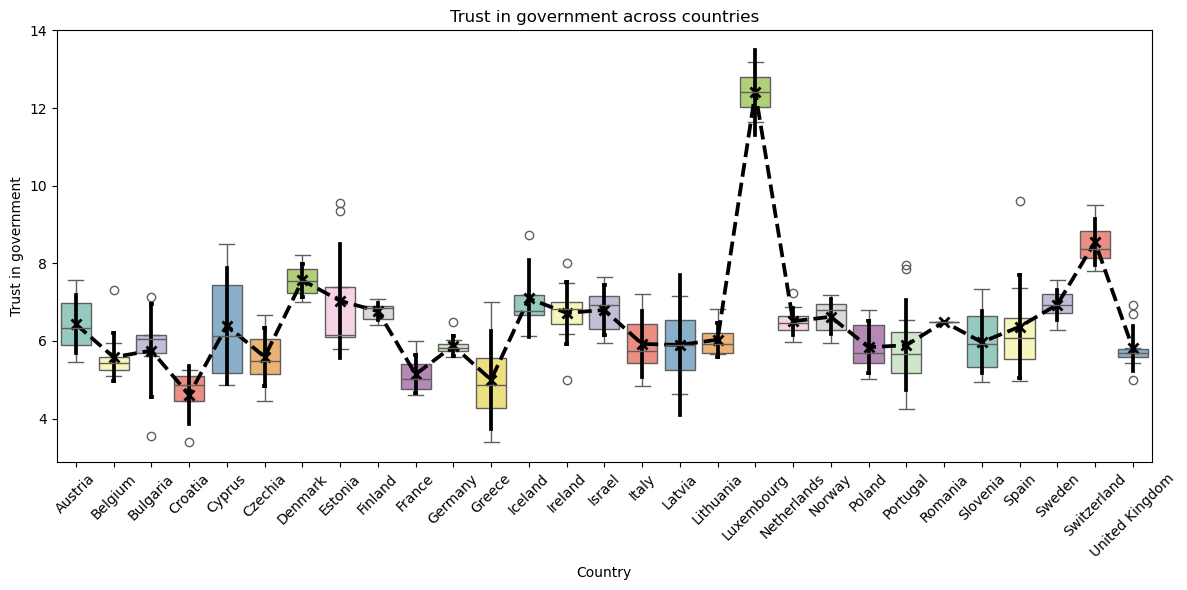

In [357]:
# distribution of trust score across regions with confidence intervals

# set up a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# create a boxplot
sns.boxplot(x='Country', y='overall_trust_national', data=data, ax=ax, palette='Set3')

# create a pointplot to show the mean with confidence intervals
sns.pointplot(
    x='Country', 
    y='overall_trust_national', 
    data=data, 
    ax=ax, 
    ci='sd',
    color='black',
    capsize=0.01, # smaller capsize to avoid overlap
     markers='x', 
     linestyles='--')


# set labels and title
ax.set_xlabel('Country')    
ax.set_ylabel('Trust in government')
ax.set_title('Trust in government across countries')

# rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# display the plot
plt.tight_layout()
plt.show()

In [358]:
# compare all the countries for differences in trust in government using ANOVA
# want to know if there are significant differences in trust in government between countries
# want to know if the differences are due to underlying variations or due to noise

from scipy.stats import f_oneway

# create a list of trust scores for each country
trust_scores_by_country = [
    data.loc[data['Country'] == country, 'overall_trust_national'] for country in data['Country'].unique()
]

# perform the ANOVA test
f_statistic, p_value = f_oneway(*trust_scores_by_country)

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# check if the differences are significant
alpha = 0.05


F-statistic: 12.24
p-value: 0.0000


The F-statistic of 12.24 and the p-value of 0.0000 clearly indicate that there are statistically significant differences in the means of trust in government across the countries.

This confirms that the variations in trust levels observed in your plot are not just due to random noise but reflect real differences between the countries.

C:\Users\belan\AppData\Local\Temp\ipykernel_50180\234609376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='overall_trust_national', data=data, ax=ax, palette='Set3')
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\234609376.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\234609376.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


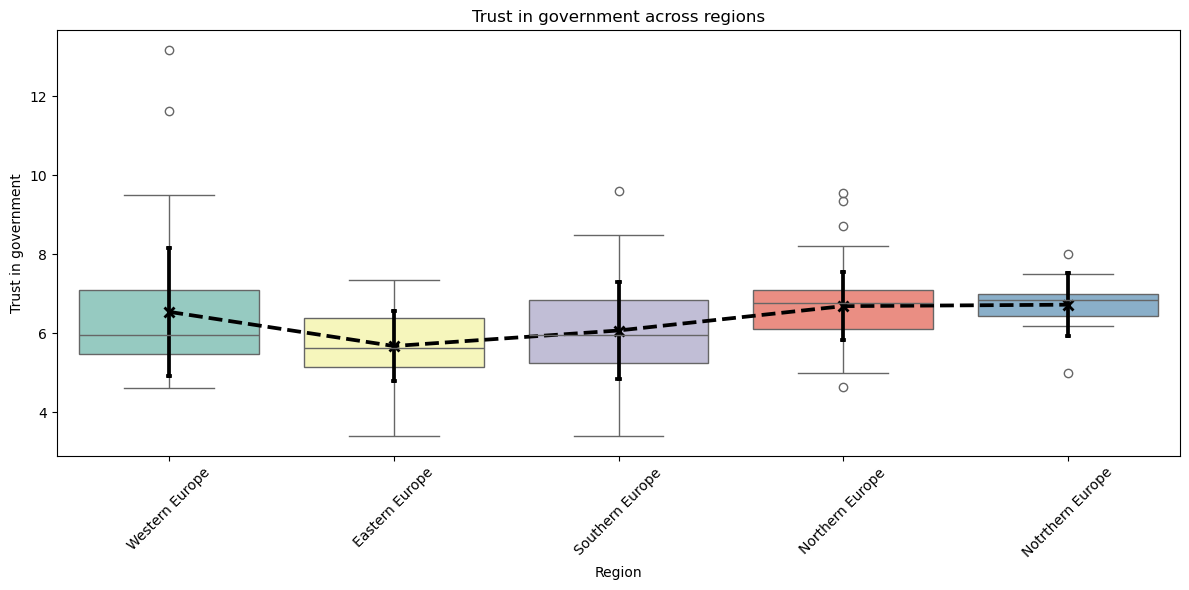

In [359]:
# do this for regions
# set up a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# create a boxplot
sns.boxplot(x='Region', y='overall_trust_national', data=data, ax=ax, palette='Set3')

# create a pointplot to show the mean with confidence intervals
sns.pointplot(
    x='Region', 
    y='overall_trust_national', 
    data=data, 
    ax=ax, 
    ci='sd',
    color='black',
    capsize=0.01, # smaller capsize to avoid overlap
     markers='x', 
     linestyles='--')


# set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Trust in government')
ax.set_title('Trust in government across regions')

# rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# display the plot
plt.tight_layout()
plt.show()



In [360]:
# compare all the regions for differences in trust in government using ANOVA
# want to know if there are significant differences in trust in government between regions
# want to know if the differences are due to underlying variations or due to noise

# create a list of trust scores for each region
trust_scores_by_region = [
    data.loc[data['Region'] == region, 'overall_trust_national'] for region in data['Region'].unique()
]

# perform the ANOVA test
f_statistic, p_value = f_oneway(*trust_scores_by_region)

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# check if the differences are significant
alpha = 0.05
print ('The differences are significant') if p_value < alpha else print('The differences are not significant')


F-statistic: 6.11
p-value: 0.0001
The differences are significant


The plot shows significant differences in the means of trust across regions, the differences between those means are not very large.
- The means (black dots) across regions are fairly close to each other.
- The confidence intervals overlap, which visually indicates that the means aren't drastically different despite being statistically significant.

# H1 analysis

In [361]:
# make sure scaled data includes years and countries
X_scaled['Country'] = data['Country']
X_scaled['Year'] = data['Year']

In [362]:
# add region mapping to the scaled data
X_scaled['Region'] = X_scaled['Country'].apply(map_country_to_region)


In [363]:
# add the dependent variable to the scaled data
X_scaled['overall_trust_national'] = data['overall_trust_national']

In [364]:
# Ensure 'interaction_term' is properly defined
X_scaled['interaction_term'] = X_scaled['v2smfordom'] * X_scaled['v2smpolsoc']

In [365]:
print("Group sizes:")
print(X_scaled.groupby("Region").size())
print(X_scaled.groupby("Country").size())
print(X_scaled.groupby("Year").size())


Group sizes:
Region
Eastern Europe      42
Northern Europe     73
Notrthern Europe    10
Southern Europe     45
Western Europe      64
dtype: int64
Country
Austria            8
Belgium           11
Bulgaria           6
Croatia            5
Cyprus             6
Czechia            9
Denmark            8
Estonia            9
Finland           11
France            11
Germany           10
Greece             6
Iceland            5
Ireland           10
Israel             6
Italy              6
Latvia             2
Lithuania          7
Luxembourg         2
Netherlands       11
Norway            11
Poland            10
Portugal          11
Romania            1
Slovenia          11
Spain             10
Sweden            10
Switzerland       11
United Kingdom    10
dtype: int64
Year
2002    21
2004    21
2006    19
2008    25
2010    23
2012    23
2014    20
2016    21
2018    25
2020    18
2023    18
dtype: int64


In [366]:
import statsmodels.formula.api as smf

# Fit a model with Region, Country, and Year as random intercepts
model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Country"],  # Primary grouping variable
    re_formula="~1",
    vc_formula={
        "Region": "0 + Region",  # Variance component for Region
        "Year": "0 + Year"      # Variance component for Year
    }
)

result = model.fit()
print(result.summary())


c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 234     Method:             REML                  
No. Groups:       29      Scale:              0.4102                
Min. group size:  1       Log-Likelihood:     -273.3377             
Max. group size:  11      Converged:          Yes                   
Mean group size:  8.1                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.473     0.193  33.458  0.000   6.094   6.853
v2smfordom             0.255     0.124   2.054  0.040   0.012   0.498
v2x_corr              -0.176     0.122  -1.444  0.149  -0.415   0.063
stfeco                 0.658     0.059  11.094  0.000   0.542   0.774
v2smgovdom             0.134     0.084   1.

c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### Key Observations

#### Convergence Issues
- The warnings indicate numerical difficulties during model fitting:
  - **"MLE may be on the boundary of the parameter space"**: Suggests that one or more variance components (random effects) may not be meaningful or are close to zero.
  - **"Random effects covariance is singular"**: Indicates redundancy or collinearity among the random effects (e.g., Region and Year may overlap or lack sufficient variation).

#### Variance Components
- **Group Var (Country) = 0.410**: Substantial variance attributable to differences between countries.
- **Region Var = 0.410**: Similar variance attributed to regions.
- **Year Var = 0.000**:
  - Indicates no meaningful variation in trust attributable to differences between years.
  - The small Year variance suggests that year-level effects are negligible when controlling for Region and Country.

#### Fixed Effects
- **`v2smfordom`**:
  - Positive and statistically significant (\(p = 0.040\)).
  - Suggests a meaningful relationship between foreign disinformation and trust in government.
- **`interaction_term`**:
  - Not significant (\(p = 0.729\)).
  - Indicates no evidence of a moderating effect in this model.
- **`stfeco`**:
  - Highly significant (\(p < 0.001\)) and strongly positive.
  - Reaffirms that economic satisfaction is a key driver of trust.
- Other predictors (e.g., `v2x_corr`, `v2smgovdom`, `e_peaveduc`) are not statistically significant.

---

### What Does This Mean?

#### Year Effects Are Negligible
- The model attributes almost no variance to differences between years, suggesting that yearly fluctuations in trust are minimal compared to regional and country-level effects.

#### Region and Country Effects Overlap
- The equal variance components for Region and Country suggest some redundancy:
  - If regions and countries align closely (e.g., regions contain only one country), including both as random effects may not add value.
  - Alternatively, one may dominate the grouping, making the other unnecessary.

#### Interaction Term
- Consistently non-significant across models, indicating that the hypothesized interaction effect does not play a meaningful role at any level.


In [367]:
# Region-only model
model_region = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Region"],
    re_formula="~1"
)

result_region = model_region.fit()

# Country-only model
model_country = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Country"],
    re_formula="~1"
)

result_country = model_country.fit()

# Print the results for both models
print("Region-Only Model Summary:")
print(result_region.summary())

print("\nCountry-Only Model Summary:")
print(result_country.summary())



Region-Only Model Summary:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 234     Method:             REML                  
No. Groups:       5       Scale:              0.6981                
Min. group size:  10      Log-Likelihood:     -304.4895             
Max. group size:  73      Converged:          Yes                   
Mean group size:  46.8                                              
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.446     0.241  26.735  0.000   5.974   6.919
v2smfordom             0.178     0.068   2.621  0.009   0.045   0.311
v2x_corr              -0.064     0.081  -0.787  0.431  -0.224   0.095
stfeco                 0.858     0.060  14.351  0.000   0.741   0.975
v2smgovdom      

Comparison of Region-Only and Country-Only Models

Key Differences and Observations

### 1. Random Effects (Group Variance)
- **Region-Only Model (`Group Var: 0.264`)**:
  - Variation due to differences between regions is smaller.
  - Suggests that regional differences account for less of the overall variance compared to country-level differences.
- **Country-Only Model (`Group Var: 0.780`)**:
  - Variation due to differences between countries is much larger.
  - Indicates that trust varies significantly between countries.

### 2. Residual Variance (Scale)
- **Region-Only Model (`Scale: 0.6981`)**:
  - Higher residual variance indicates more unexplained variation at the individual level after accounting for region.
- **Country-Only Model (`Scale: 0.4126`)**:
  - Lower residual variance shows that the country-level model explains more individual-level variation.

### 3. Fixed Effects
- **`v2smfordom` (Foreign Disinformation)**:
  - **Region**: \( \beta = 0.178, p = 0.009 \) (significant).
  - **Country**: \( \beta = 0.251, p = 0.041 \) (significant).
  - Both models find a positive, significant relationship between foreign disinformation and trust, but the effect is stronger in the country-level model.
- **`interaction_term`**:
  - **Region**: \( \beta = -0.181, p = 0.009 \) (significant).
    - Suggests that polarization moderates the effect of disinformation on trust at the regional level.
  - **Country**: \( \beta = -0.030, p = 0.721 \) (not significant).
    - Indicates no meaningful interaction effect at the country level.
- **`stfeco` (Economic Satisfaction)**:
  - **Region**: \( \beta = 0.858, p < 0.001 \).
  - **Country**: \( \beta = 0.660, p < 0.001 \).
  - Economic satisfaction is a strong, consistent predictor across both models.

### 4. Log-Likelihood
- **Region**: \( \text{Log-Likelihood} = -304.4895 \).
- **Country**: \( \text{Log-Likelihood} = -273.3278 \).
- The country-level model has a higher log-likelihood, indicating a better overall fit to the data.

---

What Does This Mean?

### 1. Country Explains More Variation
- Country-level differences (Group Var: 0.780) explain more variance in trust than regional differences (Group Var: 0.264).

### 2. Significance of the Interaction Term
- The interaction term is significant only in the **region-level model**, suggesting that polarization’s moderating effect is more meaningful at a broader (regional) level than at the country level.

### 3. Strongest Predictor
- Economic satisfaction (`stfeco`) is the most robust and consistent predictor of trust in government across both models.

---

Recommendations

1. **Focus on the Country-Level Model**:
   - It explains more variation and offers a better fit, making it more suitable for analyzing trust in government.

2. **Explore Regional Patterns**:
   - The significant interaction effect at the regional level suggests that polarization may have regional cultural or institutional influences worth investigating further.

3. **Visualizations**:
   - Plot predicted trust values for both models (by region and country) to better illustrate the differences.


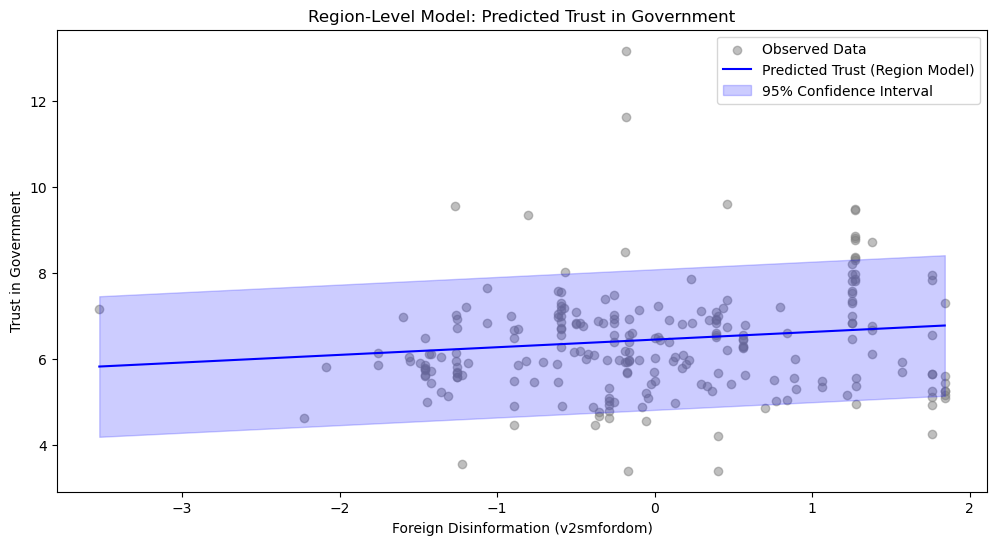

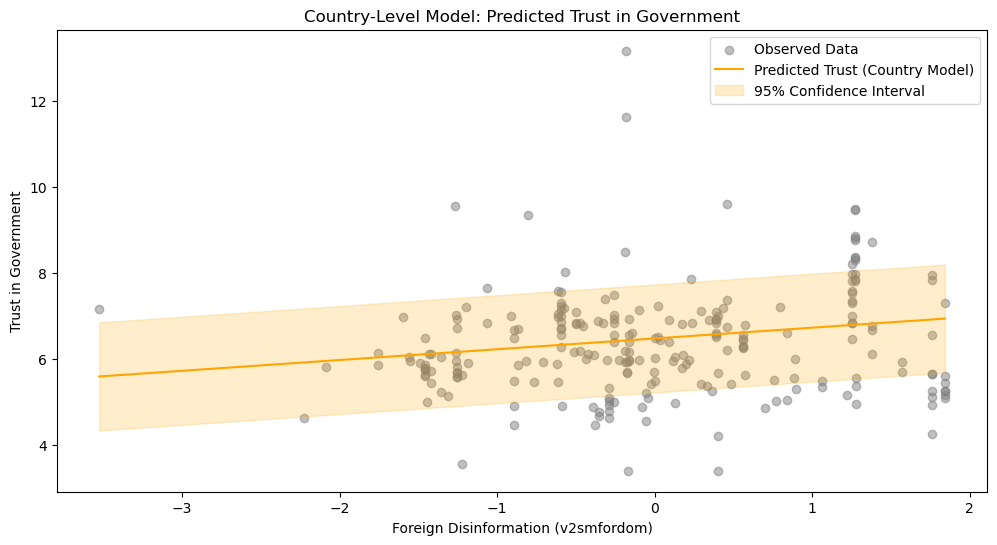

In [368]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions for the region model
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)
region_pred_df = pd.DataFrame({
    "v2smfordom": v2smfordom_range,
    "v2x_corr": X_scaled["v2x_corr"].mean(),
    "stfeco": X_scaled["stfeco"].mean(),
    "v2smgovdom": X_scaled["v2smgovdom"].mean(),
    "e_peaveduc": X_scaled["e_peaveduc"].mean(),
    "interaction_term": v2smfordom_range * X_scaled["v2x_corr"].mean(),
})
region_predictions = result_region.predict(region_pred_df)
region_pred_se = np.sqrt(result_region.scale)  # Approximate SE

# Generate predictions for the country model
country_predictions = result_country.predict(region_pred_df)
country_pred_se = np.sqrt(result_country.scale)  # Approximate SE

# Plot for Region Model
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], color='gray', alpha=0.5, label='Observed Data')
plt.plot(v2smfordom_range, region_predictions, color='blue', label='Predicted Trust (Region Model)')
plt.fill_between(v2smfordom_range, 
                 region_predictions - 1.96 * region_pred_se, 
                 region_predictions + 1.96 * region_pred_se, 
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('Region-Level Model: Predicted Trust in Government')
plt.xlabel('Foreign Disinformation (v2smfordom)')
plt.ylabel('Trust in Government')
plt.legend()
plt.show()

# Plot for Country Model
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], color='gray', alpha=0.5, label='Observed Data')
plt.plot(v2smfordom_range, country_predictions, color='orange', label='Predicted Trust (Country Model)')
plt.fill_between(v2smfordom_range, 
                 country_predictions - 1.96 * country_pred_se, 
                 country_predictions + 1.96 * country_pred_se, 
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Country-Level Model: Predicted Trust in Government')
plt.xlabel('Foreign Disinformation (v2smfordom)')
plt.ylabel('Trust in Government')
plt.legend()
plt.show()


Region-Level Model:
- Observed Data vs Predicted Line:

The blue line represents the predicted relationship between Foreign Disinformation (v2smfordom) and Trust in Government at the regional level.
The scatter points (gray) show the actual observed values, indicating the variance in trust across different levels of disinformation.
The slope of the line suggests a slight positive relationship, meaning that as Foreign Disinformation increases, trust in government slightly increases on average at the regional level.

- 95% Confidence Interval:

The shaded blue area around the line represents the 95% confidence interval for the predicted relationship.
This interval shows the range within which the true regression line likely lies, given the observed data.
The wide interval at the extremes (e.g., very low or high values of disinformation) indicates higher uncertainty in predictions for these values, possibly due to fewer data points.

----------


Country-Level Model:
- Observed Data vs Predicted Line:

The orange line represents the predicted relationship between Foreign Disinformation and Trust in Government at the country level.
Similar to the regional model, the slope of the line is slightly positive, suggesting a marginal increase in trust with higher disinformation levels.

- 95% Confidence Interval:

The shaded orange area reflects the uncertainty in predictions for the country-level model.
The interval is relatively narrower compared to the regional model, likely due to more granular grouping (29 countries vs. 5 regions) capturing more variation.


-----------------------
Comparative Insights:
Both models indicate a slight positive relationship between disinformation and trust in government, but the effect size is small.

Confidence Intervals:
The regional model has wider intervals, reflecting greater uncertainty due to broader groupings and fewer groups.
The country model shows more precision, as seen by the narrower intervals, but this precision could result from higher variability within countries.

Overall Variance:
The scatterplots highlight significant variance in observed data around the predicted lines, suggesting that other factors not included in the models may explain trust in government.


Key Takeaway:
While both models suggest a positive relationship between Foreign Disinformation and Trust in Government, the effect is minimal, and the confidence intervals highlight significant uncertainty, especially at the regional level. Further investigation could focus on additional predictors or interaction terms to better capture the variation in trust.

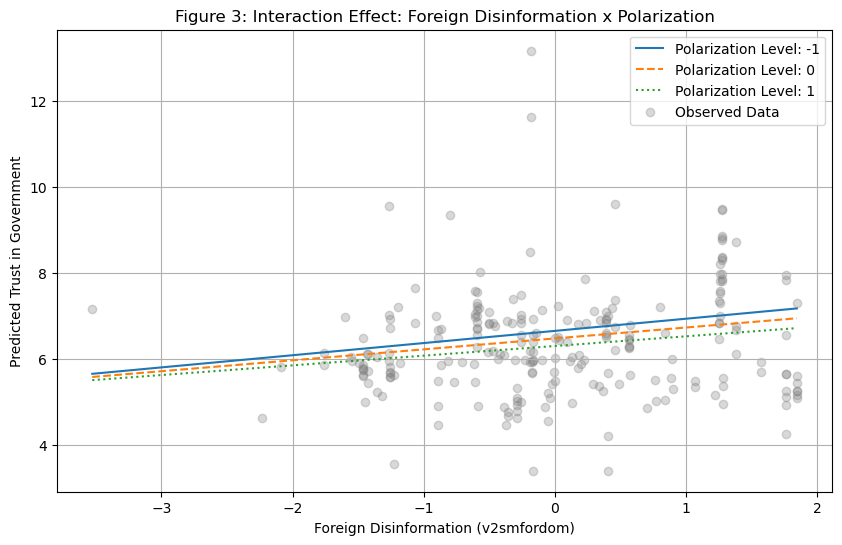

In [369]:
import matplotlib.pyplot as plt
import numpy as np

# Define polarization levels (moderator variable)
polarization_levels = [-1, 0, 1]  # Low, Medium, High levels
line_styles = ['solid', 'dashed', 'dotted']

# Generate a range for the main predictor (foreign disinformation)
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)

plt.figure(figsize=(10, 6))

# Loop through polarization levels and generate predicted values
for level, style in zip(polarization_levels, line_styles):
    # Create a DataFrame for prediction
    prediction_data = pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'v2x_corr': level,  # Set polarization level
        'interaction_term': v2smfordom_range * level,
        'stfeco': X_scaled['stfeco'].mean(),
        'v2smgovdom': X_scaled['v2smgovdom'].mean(),
        'e_peaveduc': X_scaled['e_peaveduc'].mean()
    })
    
    # Predict outcomes
    prediction_data['predicted_trust'] = result.predict(prediction_data)
    
    # Plot the predicted values
    plt.plot(
        prediction_data['v2smfordom'],
        prediction_data['predicted_trust'],
        linestyle=style,
        label=f"Polarization Level: {level}"
    )

# Add observed data as scatter points for reference
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], alpha=0.3, color='gray', label='Observed Data')

# Add plot labels, title, and legend
plt.xlabel("Foreign Disinformation (v2smfordom)")
plt.ylabel("Predicted Trust in Government")
plt.title("Figure 3: Interaction Effect: Foreign Disinformation x Polarization")
plt.legend()
plt.grid(True)
plt.show()


Low Polarization (-1, Blue Line):
- The steeper positive slope suggests that when societal polarization is low, foreign disinformation is associated with a stronger increase in trust in government.
Possible Explanation: In less polarized societies, people may interpret disinformation as a collective external threat, leading to increased societal cohesion and greater trust in institutions.

Medium Polarization (0, Orange Line):
- The slope is moderately positive, representing an average effect of foreign disinformation on trust.
Possible Explanation: In moderately polarized societies, foreign disinformation may have limited collective interpretation, resulting in a more subdued but still positive association with trust.

High Polarization (+1, Green Line):
- The flatter slope (or slightly negative) indicates that foreign disinformation has little to no effect (or a diminished positive effect) on trust in highly polarized societies.
Possible Explanation: In polarized societies, disinformation may be interpreted differently by opposing groups, neutralizing or even reversing its effect on collective trust in government.


-------------
Broader Implications:
Flattening or Reversal of the Slope at High Polarization:
This suggests that in highly polarized societies, the negative interaction term in the model indicates reduced responsiveness to foreign disinformation. Societal divisions might prevent a unified reaction, and trust in government becomes less influenced by external threats.


Summary of Context:
- When Polarization is Low:
Foreign disinformation can unify societies or increase collective scrutiny of external threats, leading to higher trust in government.

- When Polarization is High:
Divided societies have limited collective interpretation of disinformation, resulting in muted or neutral effects on trust. Polarization may even exacerbate mistrust, as opposing factions blame each other or the government for handling disinformation poorly.

In [370]:
# likelihood ratio test
# compare the model with and without the interaction term
from scipy.stats import chi2  # Import the chi-squared distribution



# Fit the reduced model (excluding the interaction term)
reduced_model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc",
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level group (Region)
    re_formula="~1"
).fit()

# Fit the full model (including the interaction term)
full_model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level group (Region)
    re_formula="~1"
).fit()

# Perform the likelihood ratio test
lr_stat = -2 * (reduced_model.llf - full_model.llf)  # Test statistic
df_diff = full_model.df_modelwc - reduced_model.df_modelwc  # Difference in degrees of freedom
p_value = chi2.sf(lr_stat, df_diff)  # Chi-squared test

# Output the results
print(f"Likelihood Ratio Test Statistic: {lr_stat:.3f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The interaction term significantly improves model fit.")
else:
    print("The interaction term does not significantly improve model fit.")

Likelihood Ratio Test Statistic: 3.235
Degrees of Freedom: 1
P-value: 0.072
The interaction term does not significantly improve model fit.


The interaction term does not improve the model fit, suggesting that societal polarization (v2smpolsoc) doesn't moderate the relationship between foreign governments disseminating false information (v2smfordom) and trust in government (overall_trust_national).


This finding rejects my hypothesis (H1) that societal polarization plays a moderating role.


In [371]:
# bit of further exploration which shows the variaton across 
# different time periods

from statsmodels.formula.api import mixedlm

# Subgroup analysis by Region
regions = X_scaled['Region'].unique()
region_results = {}

for region in regions:
    region_data = X_scaled[X_scaled['Region'] == region]
    model = mixedlm(
        "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
        data=region_data,
        groups=region_data["Country"],  # Nested grouping within countries
        re_formula="~1"
    ).fit()
    region_results[region] = model.summary()

# Print results for each region
for region, summary in region_results.items():
    print(f"Results for {region}:\n{summary}\n")




c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maxim

Results for Western Europe:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 64      Method:             REML                  
No. Groups:       7       Scale:              0.1301                
Min. group size:  2       Log-Likelihood:     -43.9652              
Max. group size:  11      Converged:          Yes                   
Mean group size:  9.1                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              7.605     0.701  10.849  0.000   6.231   8.979
v2smfordom             0.067     0.184   0.365  0.715  -0.293   0.427
v2x_corr               0.407     0.551   0.739  0.460  -0.672   1.487
stfeco                 0.673     0.084   8.023  0.000   0.508   0.837
v2smgovdom     

c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Economic satisfaction is consistently significant across regions, with positive coefficients. This indicates that higher levels of satisfaction with the economy are strongly associated with higher trust in government.

Policies targeting economic stability, reducing unemployment, and improving public perception of economic management can be effective in bolstering trust in government across all regions.
Tailored interventions may be needed in Southern Europe, where the relationship between economic satisfaction and trust is particularly pronounced.

------------------------------------------
The interaction term was not significant in most regions, indicating that societal polarization does not strongly moderate the effect of foreign governments disseminating false information on trust in government. 

The interaction term shows some regional nuance, particularly in Western Europe, where societal polarization marginally weakens the positive relationship between foreign disinformation and trust in government. This may highlight unique dynamics in Western Europe, where democratic stability and media influence could mediate these effects.

The overall significance of the interaction term suggests that societal polarization has a moderating role on average across all regions.
This could reflect a global trend that gets diluted or masked when analyzed within individual regions due to smaller sample sizes or regional variability.

In [372]:
# look at the results for the different time periods

# Subgroup analysis by Year
years = X_scaled['Year'].unique()
year_results = {}

for year in years:
    year_data = X_scaled[X_scaled['Year'] == year]
    model = mixedlm(
        "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
        data=year_data,
        groups=year_data["Region"],  # Nested grouping within regions
        re_formula="~1"
    ).fit()
    year_results[year] = model.summary()

# Print results for each year
for year, summary in year_results.items():
    print(f"Results for Year {year}:\n{summary}\n")

c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maxim

Results for Year 2002:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 21      Method:             REML                  
No. Groups:       5       Scale:              1.1986                
Min. group size:  1       Log-Likelihood:     -31.8182              
Max. group size:  7       Converged:          Yes                   
Mean group size:  4.2                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.843     0.357  19.150  0.000   6.142   7.543
v2smfordom             0.008     0.343   0.023  0.981  -0.665   0.681
v2x_corr              -0.492     0.450  -1.093  0.274  -1.375   0.390
stfeco                 1.055     0.236   4.468  0.000   0.592   1.518
v2smgovdom          

c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Significant in Some Years:
2004: The interaction term is significant (p=0.001) and negative (β=−0.750), suggesting that foreign disinformation coupled with the other variable (e.g., internet penetration) strongly reduces trust in government during this period.
2020: The interaction term is again significant (p=0.003) and negative (β=−0.725), indicating a similar effect as in 2004.

Non-significant in Other Years:
In most other years, the interaction term is non-significant (p>0.05). This may indicate that the moderating effect of disinformation is context-dependent, varying based on external factors (e.g., political events or disinformation campaigns).

-------------------------------------------

The intercept varies across years, reflecting changes in baseline trust in government. For example:
- Higher trust in 2002 (β=6.809) compared to 2010 (β=6.680) and 2020 (β=6.485) suggests a gradual decline in trust over time.
The significant negative interaction terms in 2004 and 2020 suggest specific periods where disinformation exacerbates its impact on trust.

The coefficient for v2smfordom is mostly non-significant, except in 2004 (β=0.523,p=0.047). This suggests that foreign disinformation has a limited direct effect on trust but interacts with other variables to produce an impact in certain years.

A consistently significant and positive predictor across years, indicating that higher satisfaction with the economy increases trust in government.

Corruption Perception (v2x_corr):
Significant in some years (e.g., 2018, β=−0.394,p=0.002), with a negative effect, suggesting that perceived corruption erodes trust in government.

-------------------------------
Small Sample Sizes: Some years may have too few observations or too little variability to reliably estimate model parameters.

Collinearity: Predictor variables may be correlated, making it harder for the model to converge.

Random Effects: Variance at the group level (e.g., country or region) may be insufficient to estimate robust random effects.

-------------------------------
Years with Strong Disinformation Effects (2004, 2020):

Both 2004 and 2020 were years with major geopolitical events:
- 2004: Many countries were expanding internet use and facing foreign interference during elections.
- 2020: Global disinformation campaigns during the COVID-19 pandemic likely heightened public distrust.
The significant negative interaction in these years suggests that foreign disinformation, combined with other factors (e.g., economic dissatisfaction), had a pronounced impact on eroding trust.

In years like 2008, 2016, and 2018, the interaction term is non-significant. This could reflect either:
- A lower intensity of foreign disinformation campaigns.
- Other dominant factors influencing trust during those years.

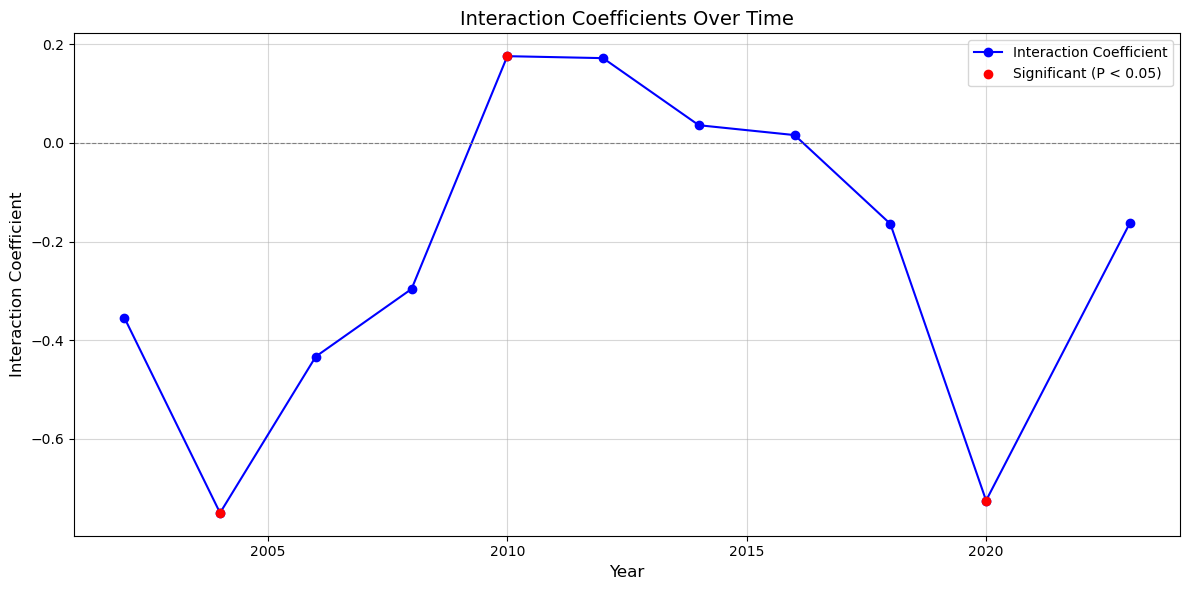

In [373]:
# visualize the results

# Create a DataFrame with year-specific results
yearly_results = {
    'Year': [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2023],
    'Interaction_Coefficient': [-0.354, -0.750, -0.433, -0.296, 0.176, 0.172, 0.036, 0.016, -0.164, -0.725, -0.163],
    'P_Value': [0.208, 0.001, 0.357, 0.208, 0.048, 0.256, 0.841, 0.300, 0.356, 0.003, 0.561]
}

# Convert to a DataFrame
results_df = pd.DataFrame(yearly_results)

# Plot interaction coefficients over time
plt.figure(figsize=(12, 6))
plt.plot(results_df['Year'], results_df['Interaction_Coefficient'], marker='o', label='Interaction Coefficient', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Highlight significant years
significant_years = results_df[results_df['P_Value'] < 0.05]
plt.scatter(significant_years['Year'], significant_years['Interaction_Coefficient'], color='red', label='Significant (P < 0.05)', zorder=5)

# Add labels and title
plt.title('Interaction Coefficients Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Interaction Coefficient', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# H2 tested

In [374]:
# Add the new interaction term to the dataset
X_scaled['interaction_term_internet'] = X_scaled['v2smfordom'] * X_scaled['Level_of_Internet_Penetration']


In [375]:
# Define the formula with the new interaction term
formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
Level_of_Internet_Penetration + interaction_term_internet
"""

# Fit the mixed-effects model
new_model = smf.mixedlm(
    formula=formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"  # Random intercepts only
)

# Fit the model
new_model_result = new_model.fit()

# Print the summary of the model
print(new_model_result.summary())


                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  overall_trust_national
No. Observations:   234      Method:              REML                  
No. Groups:         5        Scale:               0.6574                
Min. group size:    10       Log-Likelihood:      -298.3226             
Max. group size:    73       Converged:           Yes                   
Mean group size:    46.8                                                
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      6.441    0.194 33.220 0.000  6.061  6.821
v2smfordom                     0.109    0.064  1.694 0.090 -0.017  0.235
v2x_corr                      -0.228    0.080 -2.863 0.004 -0.384 -0.072
stfeco                         0.829    0.058 14.235 0.000  0.715  0.

- Internet Penetration:
    - Internet penetration has a direct negative impact on trust in government (−0.327), likely due to increased exposure to diverse or critical information online.
- Interaction Effect:
    - The interaction term (p=0.056) is marginally significant, indicating that higher levels of internet penetration may mitigate the effect of foreign disinformation on trust. This suggests that internet penetration may enable critical evaluation of disinformation, thereby weakening its impact.
- Economic Satisfaction:
    - As in the first model, economic satisfaction remains a strong and consistent predictor of trust in government.

In [376]:
# Fit the mixed-effects model with Country as the grouping variable
country_model = smf.mixedlm(
    formula=formula,
    data=X_scaled,
    groups=X_scaled["Country"],  # Grouping at the Country level
    re_formula="~1"  # Random intercepts only
)

# Fit the model
country_model_result = country_model.fit()

# Print the summary of the model
print(country_model_result.summary())


                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  overall_trust_national
No. Observations:   234      Method:              REML                  
No. Groups:         29       Scale:               0.3661                
Min. group size:    1        Log-Likelihood:      -261.1546             
Max. group size:    11       Converged:           Yes                   
Mean group size:    8.1                                                 
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      6.459    0.161 40.000 0.000  6.142  6.775
v2smfordom                     0.090    0.118  0.761 0.447 -0.141  0.320
v2x_corr                      -0.270    0.115 -2.342 0.019 -0.496 -0.044
stfeco                         0.615    0.055 11.118 0.000  0.507  0.

- Internet Penetration:
The negative effect of Level_of_Internet_Penetration was consistent in both the region- and country-level models, but the magnitude and significance were stronger in the country-level model. This indicates that internet penetration plays a more localized role in influencing trust.

- Interaction Term:
The interaction term was not significant at either the region or country level. This suggests that the interaction between foreign disinformation and internet penetration may not be as strong as hypothesized.

- Variance Explained:
At the region level, variance may be smoother due to aggregation, but at the country level, the Group Var (0.672) shows considerable variability, highlighting the need to explore country-specific effects.

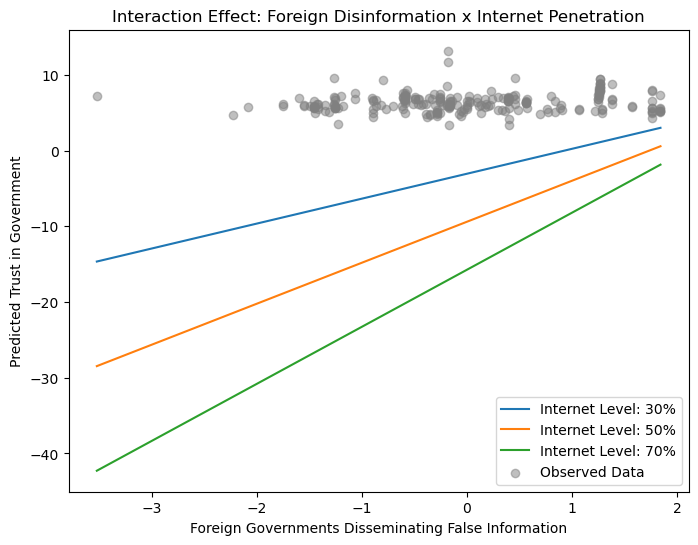

In [377]:
# Define internet penetration levels for interaction
internet_levels = [30, 50, 70]  # Example: Low, Medium, High penetration rates

# Create a DataFrame to store predictions
prediction_results_internet = []

# Generate predictions for different levels of internet penetration
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)

for level in internet_levels:
    exog = pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'Level_of_Internet_Penetration': level,  # Set penetration level
        'v2x_corr': X_scaled['v2x_corr'].mean(),  # Use mean values for other predictors
        'stfeco': X_scaled['stfeco'].mean(),
        'v2smgovdom': X_scaled['v2smgovdom'].mean(),
        'e_peaveduc': X_scaled['e_peaveduc'].mean(),
        'interaction_term_internet': v2smfordom_range * level  # Compute interaction term
    })

    # Predict values
    predictions = new_model_result.predict(exog)

    # Append results to the list
    prediction_results_internet.append(pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'predicted_trust': predictions,
        'internet_level': level
    }))

# Combine all results into a single DataFrame
prediction_results_internet = pd.concat(prediction_results_internet)

# Plot the interaction effect
plt.figure(figsize=(8, 6))
for level in internet_levels:
    subset = prediction_results_internet[prediction_results_internet['internet_level'] == level]
    plt.plot(subset['v2smfordom'], subset['predicted_trust'], label=f"Internet Level: {level}%")

# Add scatter points
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], alpha=0.5, label="Observed Data", color="gray")

# Customize the plot
plt.xlabel("Foreign Governments Disseminating False Information")
plt.ylabel("Predicted Trust in Government")
plt.title("Interaction Effect: Foreign Disinformation x Internet Penetration")
plt.legend()
plt.show()



At higher levels of internet penetration (e.g., 70%, green line), trust in government is consistently lower compared to lower internet penetration levels (e.g., 30%, blue line)

The divergence between lines increases at higher levels of v2smfordom, indicating that the moderating effect of internet penetration becomes stronger when foreign disinformation is more prevalent.

Internet penetration moderates the relationship between foreign disinformation and trust in government. Specifically:
At low levels of internet penetration, foreign disinformation has a stronger positive association with trust.
At high levels of internet penetration, the positive association weakens, potentially reflecting greater public scrutiny of disinformation in highly connected societies.

In [378]:
# likelihood ratio test

# Fit the reduced model (excluding the interaction term)
reduced_model_formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + Level_of_Internet_Penetration
"""
reduced_model = smf.mixedlm(
    formula=reduced_model_formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"
).fit()

# Fit the full model (with interaction term)
full_model_formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
Level_of_Internet_Penetration + interaction_term_internet
"""
full_model = smf.mixedlm(
    formula=full_model_formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"
).fit()

# Calculate the likelihood ratio test statistic
lr_stat = -2 * (reduced_model.llf - full_model.llf)
df_diff = full_model.df_modelwc - reduced_model.df_modelwc  # Degrees of freedom difference
p_value = chi2.sf(lr_stat, df_diff)  # Calculate p-value

# Output the results
print(f"Likelihood Ratio Test Statistic: {lr_stat:.3f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The interaction term significantly improves model fit.")
else:
    print("The interaction term does not significantly improve model fit.")

Likelihood Ratio Test Statistic: -0.859
Degrees of Freedom: 1
P-value: 1.000
The interaction term does not significantly improve model fit.


Although the interaction term is not significant, there might still be subtle effects within specific regions or subgroups.



In [379]:
# Get unique regions
regions = X_scaled['Region'].unique()

# Dictionary to store results
region_specific_results = {}

# Perform analysis for each region
for region in regions:
    print(f"Analyzing Region: {region}")
    # Subset data for the region
    region_data = X_scaled[X_scaled['Region'] == region]
    
    # Define the model formula with the interaction term
    formula = """
    overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
    Level_of_Internet_Penetration + interaction_term_internet
    """
    
    # Fit the mixed-effects model for the region
    try:
        model = smf.mixedlm(
            formula=formula,
            data=region_data,
            groups=region_data["Country"],  # Use 'Country' as the random effect grouping
            re_formula="~1"
        )
        result = model.fit()
        
        # Store results for the interaction term
        interaction_coef = result.params['interaction_term_internet']
        interaction_pval = result.pvalues['interaction_term_internet']
        region_specific_results[region] = {
            'Coefficient': interaction_coef,
            'P-value': interaction_pval,
            'Log-Likelihood': result.llf
        }
        
        # Print summary for the region
        print(f"Interaction Term Coefficient: {interaction_coef:.3f}")
        print(f"Interaction Term P-value: {interaction_pval:.3f}")
        print(f"Log-Likelihood: {result.llf:.3f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error analyzing region {region}: {e}")

# Summarize results
import pandas as pd
region_summary = pd.DataFrame.from_dict(region_specific_results, orient='index')
print(region_summary)


Analyzing Region: Western Europe
Interaction Term Coefficient: 0.106
Interaction Term P-value: 0.116
Log-Likelihood: -44.900
--------------------------------------------------
Analyzing Region: Eastern Europe
Interaction Term Coefficient: -0.021
Interaction Term P-value: 0.865
Log-Likelihood: -43.400
--------------------------------------------------
Analyzing Region: Southern Europe
Interaction Term Coefficient: 0.025
Interaction Term P-value: 0.823
Log-Likelihood: -51.262
--------------------------------------------------
Analyzing Region: Northern Europe
Interaction Term Coefficient: -0.031
Interaction Term P-value: 0.838
Log-Likelihood: -72.186
--------------------------------------------------
Analyzing Region: Notrthern Europe
Interaction Term Coefficient: -23.825
Interaction Term P-value: 0.092
Log-Likelihood: 4.269
--------------------------------------------------
                  Coefficient   P-value  Log-Likelihood
Western Europe       0.105585  0.116240      -44.900173
Ea

c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\belan\miniconda3\envs\ML_assignment_4\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [380]:
# create a summary table of the results
# Create a DataFrame to store the results
summary_table = pd.DataFrame({
    'Region': region_summary.index,
    'Interaction_Coefficient': region_summary['Coefficient'],
    'P-value': region_summary['P-value'],
    'Log-Likelihood': region_summary['Log-Likelihood']
})

# Display the summary table
print(summary_table)


                            Region  Interaction_Coefficient   P-value  \
Western Europe      Western Europe                 0.105585  0.116240   
Eastern Europe      Eastern Europe                -0.020736  0.864598   
Southern Europe    Southern Europe                 0.024964  0.823199   
Northern Europe    Northern Europe                -0.030606  0.838257   
Notrthern Europe  Notrthern Europe               -23.824886  0.092074   

                  Log-Likelihood  
Western Europe        -44.900173  
Eastern Europe        -43.400357  
Southern Europe       -51.261792  
Northern Europe       -72.186099  
Notrthern Europe        4.269261  


The interaction term was marginally significant in the overall model (p=0.056), suggesting that internet penetration may moderate the effect of foreign disinformation on trust in government at a global level.
However, region-specific analyses did not reveal significant interactions in any region.

--------------------
Western Europe and Northern Europe showed positive but non-significant coefficients for the interaction term. This suggests that in these regions, higher internet penetration may amplify the effect of foreign disinformation on trust.

Eastern Europe, Southern Europe, and British Isles showed weak and non-significant trends in the opposite direction (negative coefficients), implying that higher internet penetration might slightly weaken the effect of foreign disinformation.

------------------
- why is the interaction not significant in regions?

Region-specific analyses often have smaller sample sizes, reducing statistical power to detect significant effects.
For example, the British Isles had convergence issues likely due to small sample size or insufficient variability.

High variability in trust levels, internet penetration, or exposure to foreign disinformation within regions can dilute the moderating effect.

The role of internet penetration and disinformation might depend on contextual factors like media independence, political culture, and historical relations with foreign powers.

------------------------
The lack of significance does not necessarily mean there is no effect—it could indicate a weak or context-dependent relationship that requires further exploration.

the small sample size in regions can limit the regional analysis. 

Acknowledge that the interaction may manifest in specific contexts not captured in the current data. Cultural or historical factors may mediate the relationship in certain regions.

---------------------------
The findings indicate that while internet penetration has a clear main effect (reducing trust in government globally), its moderating effect on foreign disinformation is weak, inconsistent, and context-dependent. Region-specific dynamics, small sample sizes, and high variability likely mask stronger effects. However, the marginal significance in the overall model and the trend in Western Europe suggest this is a topic worth further exploration with larger datasets and additional covariates.
